### Profit Forecast using ARIMA Model




###  Load Data

-  How can we load the historical profit data from the CSV file?
- What preprocessing steps are necessary before fitting the ARIMA model?
- How can we determine the optimal ARIMA parameters for the profit data?
- What evaluation metrics can we use to assess the accuracy of the ARIMA model?
- How can we use the ARIMA model to forecast profits for the next 12 months?
- What visualizations can we create to interpret the historical data, model residuals, and forecasted profits?

Case Study: Profit Forecast using ARIMA
Evaluation Metrics:
Mean Absolute Error (MAE): 1016.2633640091667
Mean Squared Error (MSE): 1539871.6265948142
Root Mean Squared Error (RMSE): 1240.9156404022049


C:\Users\suyashi144893\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


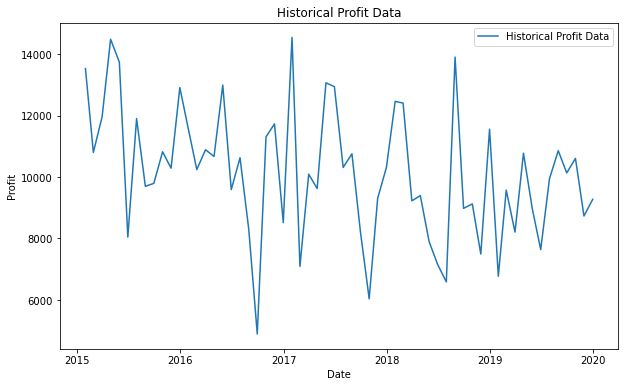

In [1]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Step 1: Problem Statement
print("Case Study: Profit Forecast using ARIMA")

# Step 2: Load Data
def load_data(file_path):
    """
    Load historical profit data from a CSV file into a pandas DataFrame.
    """
    return pd.read_csv(file_path)

# Question: How can we load the historical profit data from the CSV file?

# Step 3: Preprocess Data
def preprocess_data(data):
    """
    Preprocess the profit data:
    - Convert date column to datetime format
    - Check for missing values
    """
    # Convert date column to datetime
    data['Date'] = pd.to_datetime(data['Date'])
    
    # Check for missing values
    if data.isnull().values.any():
        print("Warning: Missing values found in the data.")
    
    return data

# Question: What preprocessing steps are necessary before fitting the ARIMA model?

# Step 4: Fit ARIMA Model
def fit_arima_model(data, p, d, q):
    """
    Fit ARIMA model to the profit data.
    """
    # Fit ARIMA model
    model = ARIMA(data, order=(p, d, q))
    model_fit = model.fit()
    
    return model_fit

# Question: How can we determine the optimal ARIMA parameters for the profit data?

# Step 5: Evaluate Model
def evaluate_model(model_fit, test_data):
    """
    Evaluate ARIMA model's performance using Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE).
    """
    # Make predictions
    forecast = model_fit.forecast(steps=len(test_data))
    
    # Calculate evaluation metrics
    mae = mean_absolute_error(test_data, forecast)
    mse = mean_squared_error(test_data, forecast)
    rmse = np.sqrt(mse)
    
    return mae, mse, rmse

# Question: What evaluation metrics can we use to assess the accuracy of the ARIMA model?

# Step 6: Forecast Future Profits
def forecast_profits(model_fit, periods):
    """
    Forecast future profits using the ARIMA model.
    """
    # Forecast future profits
    forecast = model_fit.forecast(steps=periods)
    
    return forecast

# Question: How can we use the ARIMA model to forecast profits for the next 12 months?

# Step 7: Visualization
def visualize_data(data):
    """
    Visualize historical profit data.
    """
    plt.figure(figsize=(10, 6))
    plt.plot(data['Date'], data['Profit'], label='Historical Profit Data')
    plt.xlabel('Date')
    plt.ylabel('Profit')
    plt.title('Historical Profit Data')
    plt.legend()
    plt.show()

# Question: What visualizations can we create to interpret the historical data, model residuals, and forecasted profits?

# Main Function
def main():
    # Step 2: Load Data
    file_path = 'profit_data.csv'
    profit_data = load_data(file_path)

    # Step 3: Preprocess Data
    profit_data = preprocess_data(profit_data)

    # Step 4: Fit ARIMA Model
    p, d, q = 2, 1, 2  # Example ARIMA parameters
    model_fit = fit_arima_model(profit_data['Profit'], p, d, q)

    # Step 5: Evaluate Model
    test_data = profit_data['Profit'][-12:]  # Example: Using last 12 months as test data
    mae, mse, rmse = evaluate_model(model_fit, test_data)
    print("Evaluation Metrics:")
    print("Mean Absolute Error (MAE):", mae)
    print("Mean Squared Error (MSE):", mse)
    print("Root Mean Squared Error (RMSE):", rmse)

    # Step 6: Forecast Future Profits
    forecast_period = 12  # Example: Forecasting profits for the next 12 months
    forecast = forecast_profits(model_fit, forecast_period)

    # Step 7: Visualization
    visualize_data(profit_data)

# Execute Main Function
if __name__ == "__main__":
    main()
